<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Aprendizado_n%C3%A3o_supervisionado_K_Means_Classificando_por_grupos_(cluster).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Grey'>Ciência dos Dados - Machine Learning</font>

## <font color='blue'> Classificando clientes nos respectivos grupos (Clusters)</font>

## Kmeans: Um algoritmo de aprendizagem não supervisionada (quando não se sabe qual é a saída...)

Na aprendizagem não supervisionada, os dados não possuem um label e cabe ao algoritmo descobrir automaticamente como os dados se agrupam. Isso é feito pelas medidas de distância dos pontos de dados para os centróides. Não há uma classificação final e cabe a você definir o que cada cluster representa, a partir da observação do resultado do algoritmo. Abaixo um exemplo de código sobre como realizar essa classificação a partir da saída do algoritmo.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl #permite trabalhar com diversos tipos de gráficos diferentes com funções para a customização dos gráficos como fontes diferentes, cores, tamanhos de página, etc.

In [2]:
load_iris

<function sklearn.datasets._base.load_iris>

In [3]:
# Carregando o dataset
iris = load_iris()

In [21]:
# Visualizando todo o conteúdo
# Perceba que os dados possuem apenas atributos de entrada e não possuem classificação como no dataset iris original
# https://archive.ics.uci.edu/ml/datasets/Iris
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [14]:
# Visualizando o tipo de objeto dos dados
print(type(iris.data))
print(type(iris.DESCR))
print(type(iris.feature_names))


<class 'numpy.ndarray'>
<class 'str'>
<class 'list'>


In [16]:
# Visualizando as 20 primeiras linhas
iris.data[1:10,]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
# Criando o modelo
kmeans = KMeans(n_clusters = 3, random_state = 111)
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=111)

In [25]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [26]:
# Criando o Cluster Map
cluster_map = pd.DataFrame(iris.data)

In [29]:
cluster_map['cluster'] = kmeans.labels_

In [30]:
cluster_map

,0,1,2,3,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
# Filtrando os Dados Pelo Cluster
cluster_map[cluster_map.cluster == 2]

,0,1,2,3,cluster
52,6.9,3.1,4.9,1.5,2
77,6.7,3.0,5.0,1.7,2
100,6.3,3.3,6.0,2.5,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


Para poder visualizar os dados, vamos reduzir a dimensionalidade do dataset. O objeto pca_2d permite visualizar os dados com duas dimensões (2 componentes).

In [32]:
# Reduzindo a dimensionalidade
pca = PCA(n_components = 2).fit(iris.data)

In [33]:
# Aplicando o PCA
pca_2d = pca.transform(iris.data)

In [34]:
pca_2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [35]:
pca_2d.shape

(150, 2)

In [36]:
pca_2d.shape[0]

150

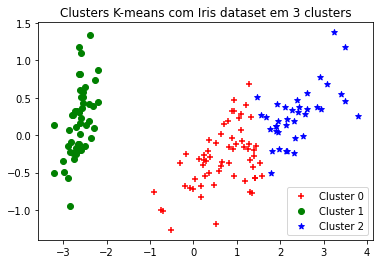

In [39]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, pca_2d.shape[0]):
    
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='r', marker = '+')
        
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='g', marker = 'o')

    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
        pl.legend([c1, c2, c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
        pl.title('Clusters K-means com Iris dataset em 3 clusters')
pl.show()